<a href="https://colab.research.google.com/github/FooolyHARD/ognp-sia-lab1-plt/blob/main/Konovalov_Arseny_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить "матричным" способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Покажите решение на графике. Если решения есть, постройте график и точкой отметьте решение (если оно одно, например, функцией [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)). ГРАФИК СТРОИТСЯ ВО ВСЕХ ТРЕХ РАССМАТРИВАЕМЫХ СЛУЧАЯХ.

In [7]:
#@title imports
import numpy as np
import matplotlib.pyplot as plt
from numpy import float128

In [23]:
from matplotlib.ticker import NullFormatter
def function_y(a, b, c, value):
    return (c - a * value) / b
#@title insert lines
#dropping needed symbols
flag = True
while (flag):
  try:
    #define first and second lines
    print("Please enter first line:")
    first_line = input(str()).split()
    print("Please enter second line:")
    second_line = input(str()).split()
    a11 = float(first_line[0])
    a12 = float(first_line[1])
    b1 = float(first_line[2])
    a21 = float(second_line[0])
    a22 = float(second_line[1])
    b2 = float(second_line[2])
    flag = False
  except ValueError:
    print("Oops!  That was no valid number.  Try again...")

Please enter first line:
a b c
Please enter second line:
1 2 3
Oops!  That was no valid number.  Try again...
Please enter first line:
1 2 3
Please enter second line:
4 5 6


In [24]:
#@title finding mats and dets
mat1 = np.array([[a11, a12], [a21, a22]])
det = np.linalg.det(mat1)
mat2 = np.array([[b1, a12], [b2, a22]])
det_x = np.linalg.det(mat2)
mat3 = np.array([[a11, b1], [a21, b2]])
det_y = np.linalg.det(mat3)


x:= -1.0
y:= 2.0000000000000004


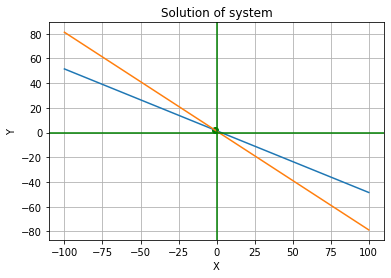

In [25]:
#@title building graphs for each solution
#there are 3 types of solutions
if det != 0: #success solution
    x = det_x / det
    y = det_y / det
    print("x:= " + str(x))
    print("y:= " + str(y))
    point_x = [x]
    point_y = [y]
    plt.plot(point_x, point_y, color='pink', linestyle='dashed', linewidth=3,
             marker='o', markersize=6, markerfacecolor='green',
             markeredgecolor='green')
    plt.grid()
    plt.plot([-100, 100], [function_y(a11, a12, b1, -100), function_y(a11, a12, b1, 100)])
    plt.plot([-100, 100], [function_y(a21, a22, b2, -100), function_y(a21, a22, b2, 100)])
    ax = plt.gca()
    ax.axhline(y=0, color='g')
    ax.axvline(x=0, color='g')
    plt.title("Solution of system")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
else: #not succes solution (inifinty solutions)
    x = 1
    y = (b1 - x * a11) / a12
    if ((x * a21 + y * a22) == b2):
        print("Infinite solutions")
        plt.plot([-100, 100], [function_y(a11, a12, b1, -100), function_y(a11, a12, b1, 100)])
        ax = plt.gca()
        ax.axhline(y=0, color='y')
        ax.axvline(x=0, color='y')
        plt.title("Infinite solutions")
        plt.show()
    else: #last type of solutions - no solution
        ax = plt.gca()
        ax.axhline(y=0, color='r')
        ax.axvline(x=0, color='r')
        plt.title("No solutions")
        plt.show()
        print("No solutions")

# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

In [26]:
#@title Imports
import matplotlib.pyplot as plt
import torch
import numpy as np

Please enter range:
 10 10


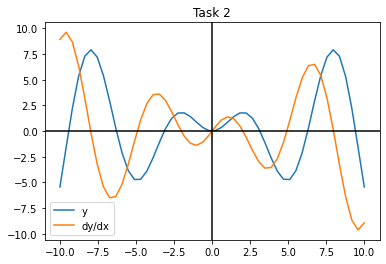

In [29]:
#@title Calculating
flag = True
while (flag):
  try:
    print("Please enter range:")
    line = input(str()).split()
    a = float(line[0])
    b = float(line[1])
    flag = False
  except ValueError:
    print("Oops!  That was no valid number.  Try again...")
x = np.linspace(-a, b, 50)
x_torch = torch.tensor(x, requires_grad=True)
y_torch = torch.sin(x_torch) * x_torch
y_torch.backward(torch.ones_like(x_torch)) #using backward

plt.plot(x, y_torch.detach().numpy(), label='y')
plt.plot(x, x_torch.grad.detach().numpy(), label='dy/dx')
plt.legend()
plt.title("Task 2")

ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()